### Linear and multiple regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
score = pd.read_csv('/Users/anand/Downloads/student_data.csv',
                    usecols=lambda x: x != 'Unnamed: 0')
print(score.shape)
print(score.head())
score.describe() # Gives the summary of the data including the mean, median, min, max, standard deviation, etc.

(25, 2)
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


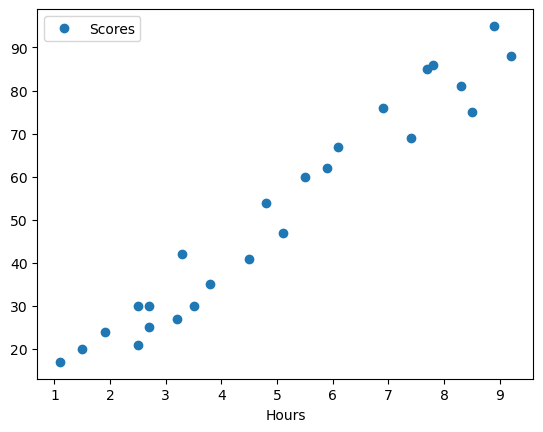

In [13]:
score.plot(x='Hours', y='Scores', style='o')
plt.show()

In [14]:
# Extracting the dependent and independent variables
# x will be the independent variable and y will be the dependent variable
x = score.iloc[:, :-1].values
y = score.iloc[:, 1].values

In [15]:
reg = LinearRegression()
reg.fit(x, y)

LinearRegression()

In [17]:
print('Intercept:', reg.intercept_)
print('Coefficient:', reg.coef_)
# Now the model is y = 9.77580339 * x + 2.48367341
y_pred = reg.predict(x)

Intercept: 2.483673405373203
Coefficient: [9.77580339]


In [20]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df)
# Let's calculate all the errors
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(y, y_pred))
print('Mean Squared Error:', mean_squared_error(y, y_pred))
print('R2 Score:', r2_score(y, y_pred))

    Actual  Predicted
0       21  26.923182
1       47  52.340271
2       27  33.766244
3       75  85.578002
4       30  36.698985
5       20  17.147378
6       88  92.421065
7       60  56.250592
8       81  83.622842
9       25  28.878343
10      85  77.757360
11      62  60.160913
12      41  46.474789
13      42  34.743825
14      17  13.237057
15      95  89.488324
16      30  26.923182
17      24  21.057700
18      67  62.116074
19      69  74.824618
20      30  28.878343
21      54  49.407530
22      35  39.631726
23      76  69.936717
24      86  78.734940
Mean Absolute Error: 4.972805319866374
Mean Squared Error: 28.882730509245448
R2 Score: 0.9529481969048356


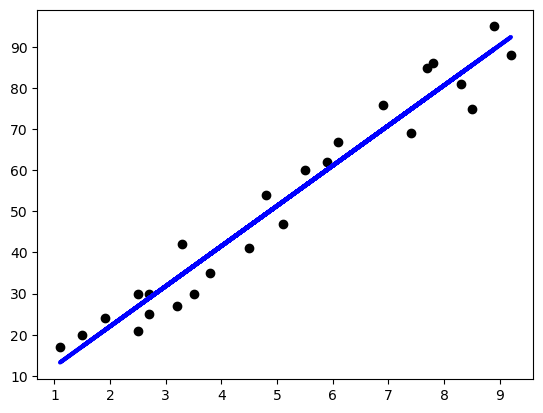

In [22]:
# Let's plot the data and the fitted line
plt.scatter(x, y, color='black')
plt.plot(x, y_pred, color='blue', linewidth=3)
plt.show()

In [26]:
#### Now let's take another example of more than one independent variable.
scores = pd.read_csv('/Users/anand/Downloads/startups.csv')
print(scores.shape)
print(scores.head())

(50, 5)
   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [31]:
# drop the profit column that we need to predict
x = scores.drop('Profit', axis=1)
x = x.drop('State', axis=1)
y = scores['Profit']
print(x.head())
print(y.head())

   R&D Spend  Administration  Marketing Spend
0  165349.20       136897.80        471784.10
1  162597.70       151377.59        443898.53
2  153441.51       101145.55        407934.54
3  144372.41       118671.85        383199.62
4  142107.34        91391.77        366168.42
0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64


In [36]:
# Let's do a linear regression
# split the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(x_train, y_train)
print('Intercept:', reg.intercept_)
print('Coefficient:', reg.coef_)
y_pred = reg.predict(x_test)
# Let's calculate all the errors
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

# Let's plot the data and the fitted line
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

Intercept: 42989.00816508668
Coefficient: [0.77884104 0.0293919  0.03471025]
Mean Absolute Error: 7320.441614848122
Mean Squared Error: 77506468.16885412
R2 Score: 0.939395591782057
       Actual      Predicted
28  103282.38  103901.896970
11  144259.40  132763.059931
10  146121.95  133567.903700
41   77798.83   72911.789767
2   191050.39  179627.925672
27  105008.31  115166.648648
38   81229.06   67113.576906
31   97483.56   98154.806868
22  110352.25  114756.115552
4   166187.94  169064.014088


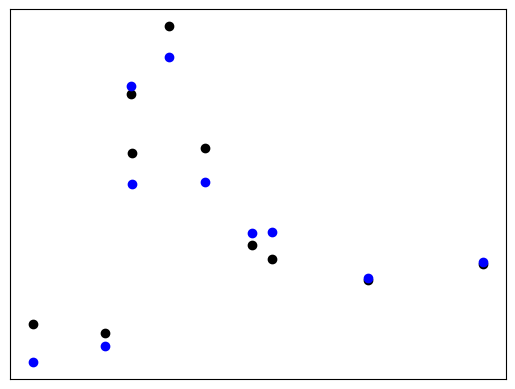

In [39]:
plt.scatter(x_test['Administration'], y_test, color='black')
plt.scatter(x_test['Administration'], y_pred, color='blue')

plt.xticks(())
plt.yticks(())
plt.show()